In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
cd 언론사별

C:\Users\h_j06\Desktop\DMF\2nd_project\언론사별


C:\Users\h_j06\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### 진보 언론

In [3]:
text_list1 = pd.read_pickle(filepath_or_buffer = 'media1_Text_Prep.pkl')

# 리스트 안의 문자열을 하나로 합치고, 띄어쓰기를 기준으로 단어를 분리
all_words = ' '.join([''.join(map(str, sublist)) for sublist in text_list1]).split()

# 단어 빈도수 계산
word_count = Counter(all_words)

# 상위 100개 단어 추출
top_100_words = word_count.most_common(100)
print(top_100_words)

[('탄소', 2311), ('에너지', 1986), ('정부', 1860), ('대응', 1787), ('문제', 1706), ('사회', 1579), ('세계', 1532), ('지구', 1448), ('행동', 1262), ('정책', 1261), ('지나다', 1154), ('크다', 1143), ('전환', 1125), ('온실가스', 1076), ('가능', 1052), ('국가', 1030), ('한국', 1014), ('배출', 1009), ('필요', 995), ('시민', 989), ('목표', 987), ('경제', 987), ('생각', 987), ('많다', 976), ('중립', 964), ('피해', 882), ('산업', 875), ('감축', 859), ('미국', 849), ('석탄', 816), ('이상', 812), ('계획', 800), ('재생', 796), ('발전', 796), ('미래', 795), ('관련', 782), ('나오다', 754), ('기업', 741), ('후보', 737), ('상황', 703), ('연구', 695), ('열리다', 679), ('배출량', 666), ('앞', 665), ('지원', 664), ('밝히다', 660), ('기술', 655), ('정치', 655), ('만들다', 653), ('녹색', 653), ('보이다', 649), ('성장', 645), ('지난해', 644), ('발생', 644), ('영향', 644), ('줄이다', 634), ('.기후', 633), ('발전소', 633), ('단체', 608), ('교육', 608), ('가다', 595), ('상승', 580), ('기온', 580), ('참여', 577), ('도시', 564), ('높다', 563), ('물', 562), ('시작', 561), ('정의', 549), ('제공', 548), ('중요', 547), ('국제', 544), ('생산', 541), ('사용', 541), ('인간', 

In [4]:
text_list2 = pd.read_pickle(filepath_or_buffer = 'media2_Text_Prep.pkl')

# 리스트 안의 문자열을 하나로 합치고, 띄어쓰기를 기준으로 단어를 분리
all_words = ' '.join([''.join(map(str, sublist)) for sublist in text_list2]).split()

# 단어 빈도수 계산
word_count = Counter(all_words)

# 상위 100개 단어 추출
top_100_words = word_count.most_common(100)
print(top_100_words)

[('탄소', 985), ('대응', 710), ('지구', 689), ('세계', 675), ('에너지', 530), ('정부', 520), ('문제', 515), ('사회', 473), ('중립', 445), ('미국', 424), ('한국', 396), ('크다', 394), ('기술', 376), ('이상', 366), ('미래', 362), ('온실가스', 358), ('국가', 352), ('많다', 349), ('지나다', 345), ('가능', 343), ('행동', 342), ('배출', 336), ('산업', 333), ('상승', 328), ('정책', 325), ('기업', 322), ('국제', 321), ('활동', 298), ('열리다', 295), ('시민', 293), ('목표', 293), ('필요', 287), ('교육', 277), ('피해', 277), ('경제', 273), ('감축', 269), ('관련', 262), ('지난해', 260), ('발생', 258), ('참여', 258), ('청소년', 246), ('계획', 244), ('사용', 241), ('개발', 240), ('지속', 237), ('진행', 234), ('연구', 231), ('도시', 231), ('만들다', 230), ('줄이다', 230), ('앞', 225), ('사업', 225), ('배출량', 224), ('활용', 220), ('이번', 219), ('올해', 218), ('다양', 217), ('물', 216), ('후', 215), ('회의', 211), ('밝히다', 210), ('제공', 208), ('교수', 207), ('상황', 205), ('시간', 205), ('지원', 205), ('나오다', 201), ('실천', 200), ('영향', 200), ('발전', 200), ('시작', 199), ('단체', 199), ('해결', 198), ('.기후', 195), ('유엔', 195), ('발표', 195), (

In [5]:
# 데이터 준비
jinbo_keywords = {
    '탄소': 2311, '에너지': 1986, '정부': 1860, '대응': 1787, '문제': 1706, '사회': 1579, '세계': 1532, 
    '지구': 1448, '행동': 1262, '정책': 1261, '지나다': 1154, '크다': 1143, '전환': 1125, 
    '온실가스': 1076, '가능': 1052, '국가': 1030, '한국': 1014, '배출': 1009, '필요': 995, 
    '시민': 989, '목표': 987, '경제': 987, '생각': 987, '많다': 976, '중립': 964, '피해': 882, 
    '산업': 875, '감축': 859, '미국': 849, '석탄': 816, '이상': 812, '계획': 800, '재생': 796, 
    '발전': 796, '미래': 795, '관련': 782, '나오다': 754, '기업': 741, '후보': 737, '상황': 703, 
    '연구': 695, '열리다': 679, '배출량': 666, '앞': 665, '지원': 664, '밝히다': 660, '기술': 655, 
    '정치': 655, '만들다': 653, '녹색': 653, '보이다': 649, '성장': 645, '지난해': 644, '발생': 644, 
    '영향': 644, '줄이다': 634, '발전소': 633, '단체': 608, '교육': 608, '가다': 595, '상승': 580, 
    '기온': 580, '참여': 577, '도시': 564, '높다': 563, '물': 562, '시작': 561, '정의': 549, 
    '제공': 548, '중요': 547, '국제': 544, '생산': 541, '사용': 541, '인간': 533, '대통령': 531, 
    '인하다': 529, '쓰다': 527, '결과': 522, '생태': 521, '발표': 520, '전': 519, '산불': 515, 
    '대표': 515, '곳': 513, '오다': 511, '이번': 511, '시간': 510, '활동': 509, '폭염': 498, 
    '청소년': 496, '과정': 496, '올해': 493, '들다': 488, '지속': 486, '진행': 484, '재난': 484, 
    '보고서': 481, '후': 477, '살다': 476
}

bosu_keywords = {
    '탄소': 985, '대응': 710, '지구': 689, '세계': 675, '에너지': 530, '정부': 520, '문제': 515, 
    '사회': 473, '중립': 445, '미국': 424, '한국': 396, '크다': 394, '기술': 376, '이상': 366, 
    '미래': 362, '온실가스': 358, '국가': 352, '많다': 349, '지나다': 345, '가능': 343, '행동': 342, 
    '배출': 336, '산업': 333, '상승': 328, '정책': 325, '기업': 322, '국제': 321, '활동': 298, 
    '열리다': 295, '시민': 293, '목표': 293, '필요': 287, '교육': 277, '피해': 277, '경제': 273, 
    '감축': 269, '관련': 262, '지난해': 260, '발생': 258, '참여': 258, '청소년': 246, '계획': 244, 
    '사용': 241, '개발': 240, '지속': 237, '진행': 234, '연구': 231, '도시': 231, '만들다': 230, 
    '줄이다': 230, '앞': 225, '사업': 225, '배출량': 224, '활용': 220, '이번': 219, '올해': 218, 
    '다양': 217, '물': 216, '후': 215, '회의': 211, '밝히다': 210, '제공': 208, '교수': 207, 
    '상황': 205, '시간': 205, '지원': 205, '나오다': 201, '실천': 200, '영향': 200, '발전': 200, 
    '시작': 199, '단체': 199, '해결': 198, '.기후': 195, '유엔': 195, '발표': 195, '협력': 192, 
    '온난': 191, '대표': 190, '자연': 190, '전환': 189, '생각': 188, '대통령': 186, '재생': 185, 
    '생산': 181, '보이다': 180, '영국': 179, '산불': 179, '높다': 178, '전': 178, '분야': 178, 
    '인하다': 178, '녹색': 178, '기온': 176, '강조': 174, '과학': 173, '중요': 173, '나서다': 173, 
    '재난': 173, '인류': 172
}

# 정규화 처리 (보도건수로 나누기)
jinbo_total = 965
bosu_total = 419

jinbo_normalized = {k: v/jinbo_total for k, v in jinbo_keywords.items()}
bosu_normalized = {k: v/bosu_total for k, v in bosu_keywords.items()}

# 공통 키워드 및 정규화된 빈도수 비교
print("공통 키워드 및 정규화된 빈도수 비교")
print("키워드\t진보 언론사\t보수 언론사\t차이")

common_keywords = set(jinbo_normalized.keys()) & set(bosu_normalized.keys())

for keyword in common_keywords:
    jinbo_freq = jinbo_normalized[keyword]
    bosu_freq = bosu_normalized[keyword]
    diff = abs(jinbo_freq - bosu_freq)
    print(f"{keyword}\t{jinbo_freq:.4f}\t{bosu_freq:.4f}\t{diff:.4f}")

# 고유 키워드 출력
print("\n진보 언론사 고유 키워드 및 정규화된 빈도수")
for keyword in set(jinbo_normalized.keys()) - set(bosu_normalized.keys()):
    print(f"{keyword}: {jinbo_normalized[keyword]:.4f}")

print("\n보수 언론사 고유 키워드 및 정규화된 빈도수")
for keyword in set(bosu_normalized.keys()) - set(jinbo_normalized.keys()):
    print(f"{keyword}: {bosu_normalized[keyword]:.4f}")

공통 키워드 및 정규화된 빈도수 비교
키워드	진보 언론사	보수 언론사	차이
올해	0.5109	0.5203	0.0094
사용	0.5606	0.5752	0.0146
에너지	2.0580	1.2649	0.7931
국가	1.0674	0.8401	0.2273
필요	1.0311	0.6850	0.3461
시간	0.5285	0.4893	0.0392
미국	0.8798	1.0119	0.1321
한국	1.0508	0.9451	0.1057
가능	1.0902	0.8186	0.2715
중요	0.5668	0.4129	0.1540
생산	0.5606	0.4320	0.1286
기술	0.6788	0.8974	0.2186
지속	0.5036	0.5656	0.0620
배출	1.0456	0.8019	0.2437
미래	0.8238	0.8640	0.0401
산불	0.5337	0.4272	0.1065
기온	0.6010	0.4200	0.1810
많다	1.0114	0.8329	0.1785
문제	1.7679	1.2291	0.5388
피해	0.9140	0.6611	0.2529
크다	1.1845	0.9403	0.2441
상승	0.6010	0.7828	0.1818
발표	0.5389	0.4654	0.0735
관련	0.8104	0.6253	0.1851
계획	0.8290	0.5823	0.2467
진행	0.5016	0.5585	0.0569
전	0.5378	0.4248	0.1130
발전	0.8249	0.4773	0.3475
세계	1.5876	1.6110	0.0234
활동	0.5275	0.7112	0.1838
만들다	0.6767	0.5489	0.1278
녹색	0.6767	0.4248	0.2519
전환	1.1658	0.4511	0.7147
경제	1.0228	0.6516	0.3712
청소년	0.5140	0.5871	0.0731
생각	1.0228	0.4487	0.5741
대통령	0.5503	0.4439	0.1063
앞	0.6891	0.5370	0.1521
지난해	0.6674	0.6205	0.0468
물	0.5824	0.5155	0.0

In [6]:
# 현재 사용 중인 컴퓨터에 설치한 전체 폰트 파일명을 리스트로 반환
fontList = fm.findSystemFonts(fontext = 'ttf')

# 리스트에서 특정 문자열(폰트명)을 포함하는 파일명 선택
fontPath = [font for font in fontList if 'Gowun' in font]

# 반복문으로 컴퓨터에 설치한 폰트명 출력
for font in fontPath:
    print(fm.FontProperties(fname = font).get_name())

Gowun Batang
Gowun Batang


In [7]:
# 한글폰트와 글자 크기 설정
# [참고] 폰트를 설치하고 .matplotlib 폴더에서 fontlist-v3xx.json 파일을 삭제해야 함
plt.rc(group = 'font', family = 'Gowun Batang', size = 10)

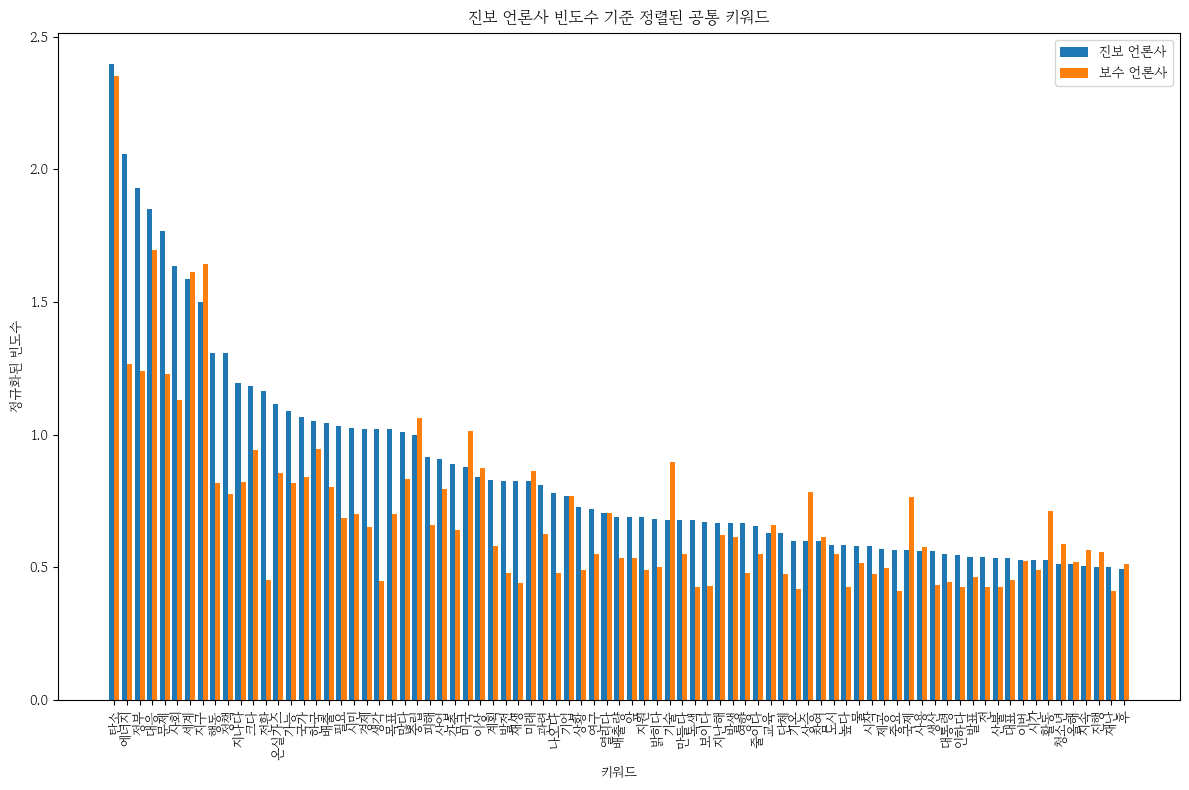

In [8]:
# 공통 키워드 추출
common_keywords = set(jinbo_normalized.keys()).intersection(bosu_normalized.keys())

# 진보 언론사 빈도수 기준으로 공통 키워드 정렬
sorted_common_keywords = sorted(common_keywords, key=lambda k: jinbo_normalized[k], reverse=True)

# 정렬된 공통 키워드의 값 가져오기
jinbo_values = [jinbo_normalized[k] for k in sorted_common_keywords]
bosu_values = [bosu_normalized[k] for k in sorted_common_keywords]

# 시각화
x = np.arange(len(sorted_common_keywords))
plt.figure(figsize=(12, 8))
plt.bar(x - 0.2, jinbo_values, 0.4, label='진보 언론사')
plt.bar(x + 0.2, bosu_values, 0.4, label='보수 언론사')
plt.xticks(x, sorted_common_keywords, rotation=90)
plt.title('진보 언론사 빈도수 기준 정렬된 공통 키워드')
plt.xlabel('키워드')
plt.ylabel('정규화된 빈도수')
plt.legend()
plt.tight_layout()

plt.savefig('진보보수공통키워드비교.png')
plt.show()

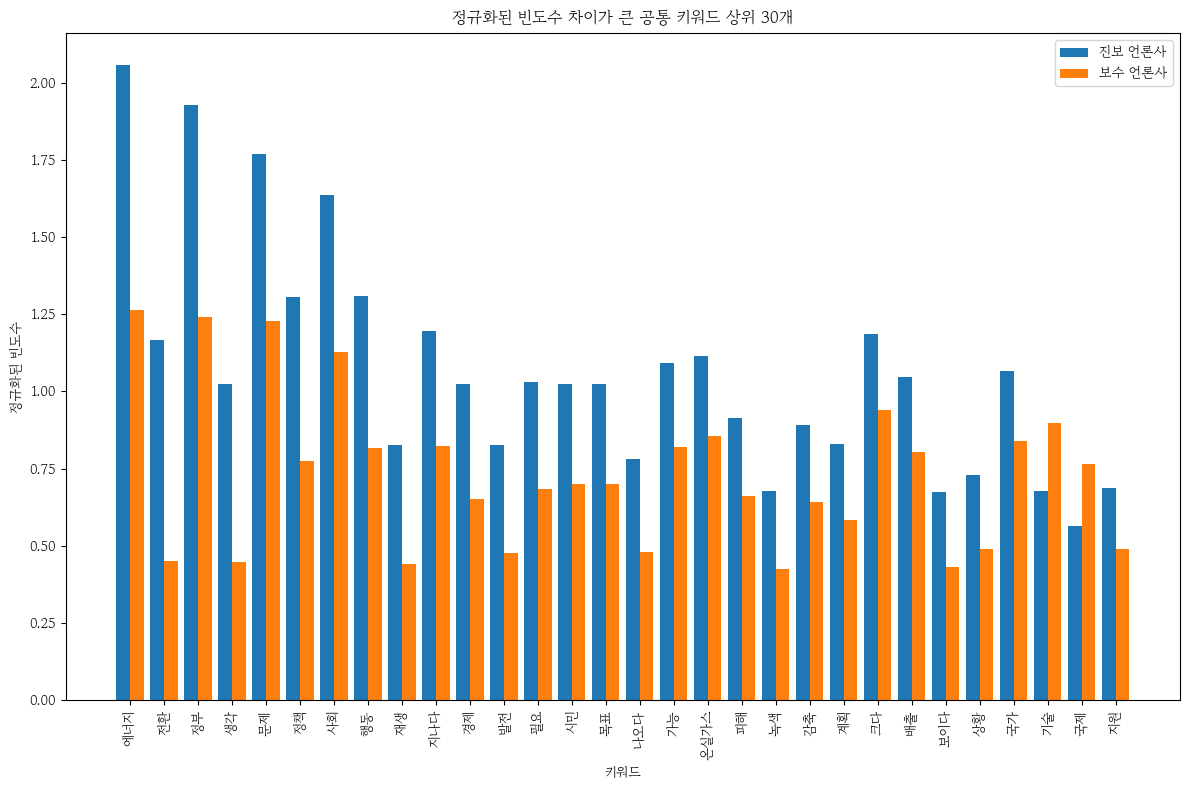

In [9]:
# 공통 키워드 추출
common_keywords = set(jinbo_normalized.keys()).intersection(bosu_normalized.keys())

# 차이 계산 및 정렬
diff_dict = {k: abs(jinbo_normalized[k] - bosu_normalized[k]) for k in common_keywords}
sorted_diff = sorted(diff_dict.items(), key=lambda item: item[1], reverse=True)[:30]

# 상위 30개 차이가 큰 공통 키워드만 선택
top_30_keywords = [item[0] for item in sorted_diff]
jinbo_values = [jinbo_normalized[k] for k in top_30_keywords]
bosu_values = [bosu_normalized[k] for k in top_30_keywords]

# 시각화
x = np.arange(len(top_30_keywords))
plt.figure(figsize=(12, 8))
plt.bar(x - 0.2, jinbo_values, 0.4, label='진보 언론사')
plt.bar(x + 0.2, bosu_values, 0.4, label='보수 언론사')
plt.xticks(x, top_30_keywords, rotation=90)
plt.title('정규화된 빈도수 차이가 큰 공통 키워드 상위 30개')
plt.xlabel('키워드')
plt.ylabel('정규화된 빈도수')
plt.legend()
plt.tight_layout()

plt.savefig('진보보수공통키워드비교30개.png')
plt.show()

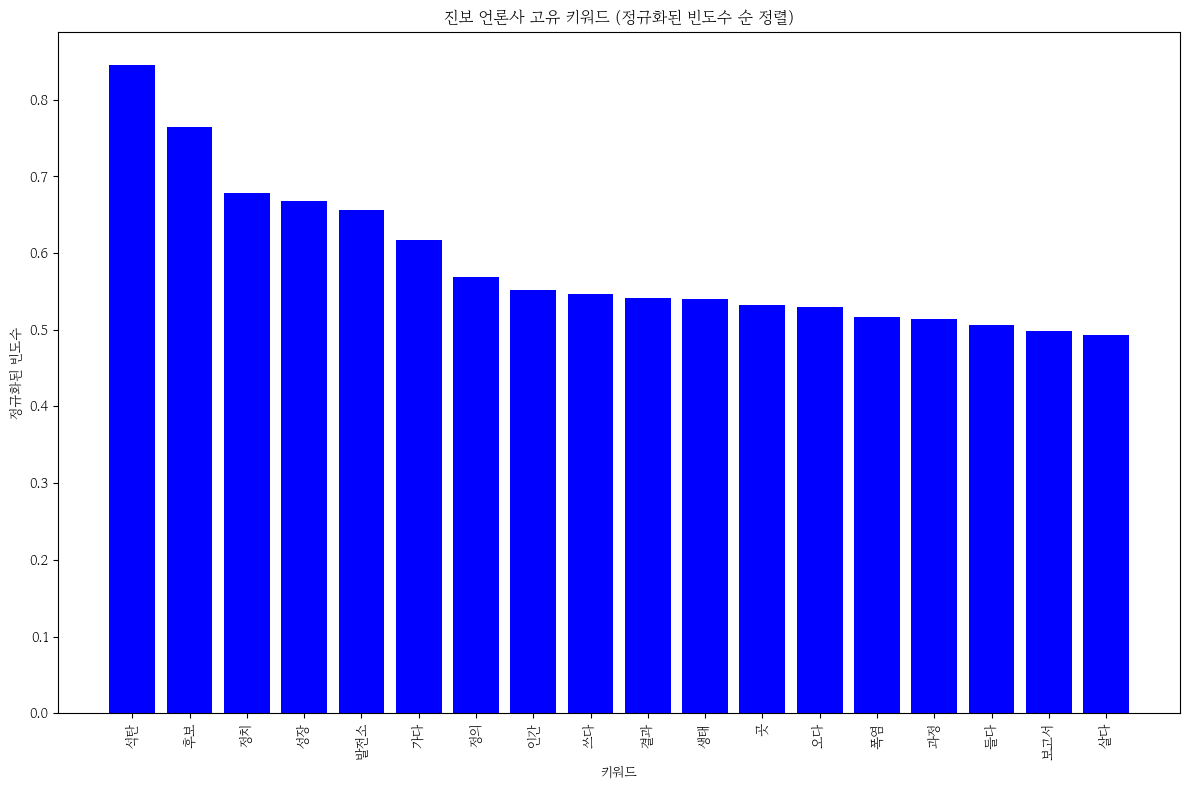

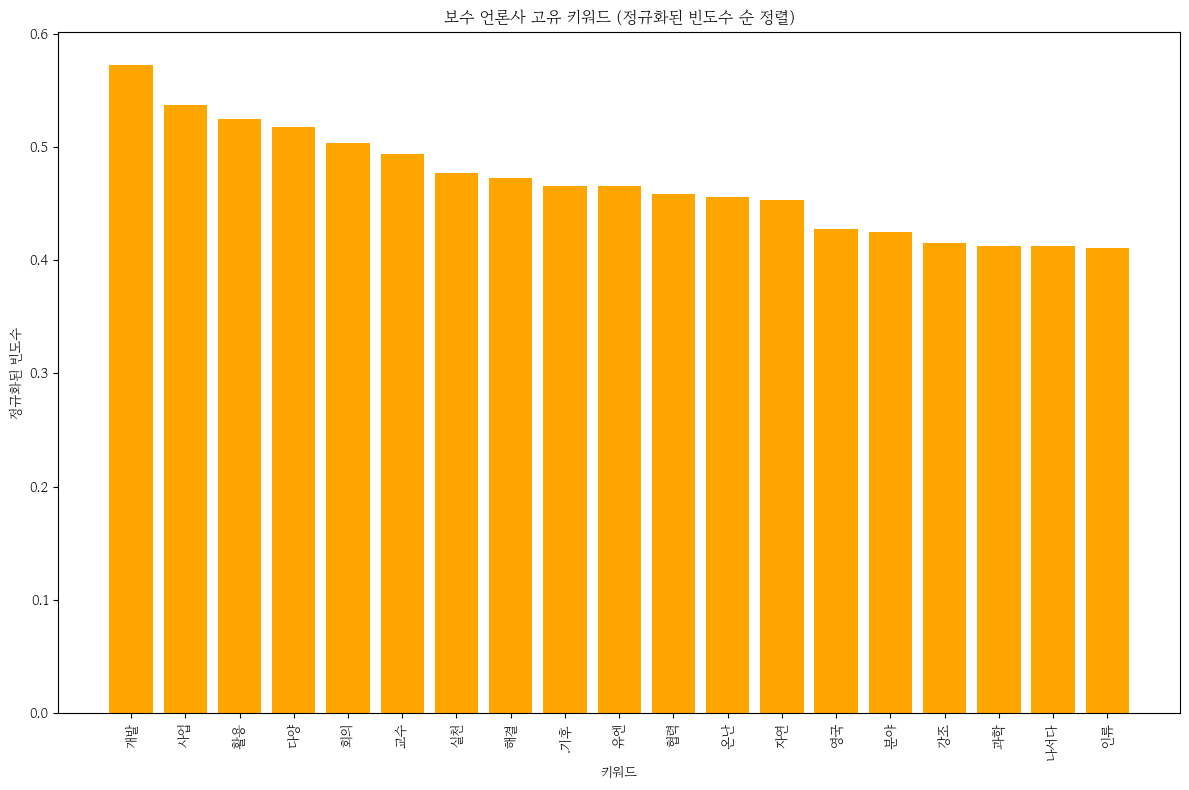

In [17]:
# 진보 언론 고유 키워드 추출 및 정렬
jinbo_unique_keywords = {k: v for k, v in sorted(jinbo_normalized.items(), key=lambda item: item[1], reverse=True) if k not in bosu_normalized}
jinbo_keys = list(jinbo_unique_keywords.keys())
jinbo_values = list(jinbo_unique_keywords.values())

# 보수 언론 고유 키워드 추출 및 정렬
bosu_unique_keywords = {k: v for k, v in sorted(bosu_normalized.items(), key=lambda item: item[1], reverse=True) if k not in jinbo_normalized}
bosu_keys = list(bosu_unique_keywords.keys())
bosu_values = list(bosu_unique_keywords.values())

# 진보 언론 고유 키워드 시각화
x_jinbo = np.arange(len(jinbo_keys))
plt.figure(figsize=(12, 8))
plt.bar(x_jinbo, jinbo_values, color='blue')
plt.xticks(x_jinbo, jinbo_keys, rotation=90)
plt.title('진보 언론사 고유 키워드 (정규화된 빈도수 순 정렬)')
plt.xlabel('키워드')
plt.ylabel('정규화된 빈도수')
plt.tight_layout()

plt.savefig('진보언론고유키워드시각화.png')
plt.show()

# 보수 언론 고유 키워드 시각화
x_bosu = np.arange(len(bosu_keys))
plt.figure(figsize=(12, 8))
plt.bar(x_bosu, bosu_values, color='orange')
plt.xticks(x_bosu, bosu_keys, rotation=90)
plt.title('보수 언론사 고유 키워드 (정규화된 빈도수 순 정렬)')
plt.xlabel('키워드')
plt.ylabel('정규화된 빈도수')
plt.tight_layout()

plt.savefig('보수언론고유키워드시각화.png')
plt.show()

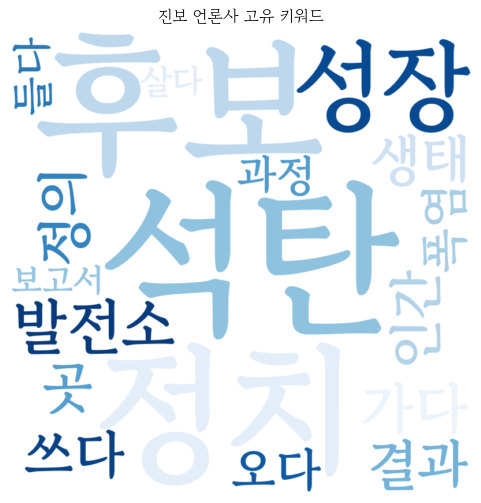

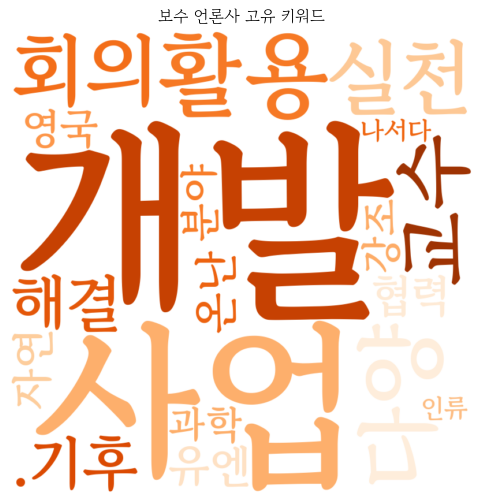

In [18]:
# 폰트 경로 설정
font_path = fontPath[0]  # 이전에 설정한 Gowun Batang 폰트를 사용

# 진보 언론사 워드클라우드
wc_jinbo = WordCloud(
    font_path=font_path,
    width=800,
    height=800,
    background_color='white',  # 흰색 배경
    colormap='Blues'  # 블루 계열 컬러맵
).generate_from_frequencies(frequencies=jinbo_unique_keywords)

plt.figure(figsize=(6, 6))
plt.imshow(wc_jinbo, interpolation='bilinear')
plt.axis('off')
plt.title('진보 언론사 고유 키워드')
plt.savefig('진보언론고유키워드클라우드.png')
plt.show()

# 보수 언론사 워드클라우드
wc_bosu = WordCloud(
    font_path=font_path,
    width=800,
    height=800,
    background_color='white',  # 흰색 배경
    colormap='Oranges'  # 레드 계열 컬러맵
).generate_from_frequencies(frequencies=bosu_unique_keywords)

plt.figure(figsize=(6, 6))
plt.imshow(wc_bosu, interpolation='bilinear')
plt.axis('off')
plt.title('보수 언론사 고유 키워드')
plt.savefig('보수언론고유키워드클라우드.png')
plt.show()